### Classification Evaluation Metrics

1. Evaluating a model is a core part of building an effective machine learning model
2. There are several evaluation metrics, like confusion matrix, cross-validation, AUC-ROC curve, etc.
3. Different evaluation metrics are used for different kinds of problems

### Evaluation Metrics:
    
1. Confusion Matrix
2. F1 Score
3. AUC – ROC
4. Log Loss
5. Gini Coefficient
6. Concordant – Discordant Ratio


#### Warming up: Types of Predictive models
When we talk about predictive models, we are talking either about a regression model (continuous output) or a classification model (nominal or binary output). The evaluation metrics used in each of these models are different.

In classification problems, we use two types of algorithms (dependent on the kind of output it creates):

##### Class output: 

Algorithms like SVM and KNN create a class output. For instance, in a binary classification problem, the outputs will be either 0 or 1. However, today we have algorithms which can convert these class outputs to probability. But these algorithms are not well accepted by the statistics community.

##### Probability output: 
Algorithms like Logistic Regression, Random Forest, Gradient Boosting, Adaboost etc. give probability outputs. Converting probability outputs to class output is just a matter of creating a threshold probability.
In regression problems, we do not have such inconsistencies in output. The output is always continuous in nature and requires no further treatment.

 

##### Illustrative Example

For a classification model evaluation metric discussion, I have used my predictions for the problem BCI challenge on Kaggle. The solution of the problem is out of the scope of our discussion here. However the final predictions on the training set have been used for this article. The predictions made for this problem were probability outputs which have been converted to class outputs assuming a threshold of 0.5.



### 1. Confusion Matrix
A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. Here are a few definitions, you need to remember for a confusion matrix :

#### Accuracy : 
    the proportion of the total number of predictions that were correct.
#### Positive Predictive Value or Precision : 
    the proportion of positive cases that were correctly identified.
#### Negative Predictive Value : 
    the proportion of negative cases that were correctly identified.
#### Sensitivity or Recall : 
    the proportion of actual positive cases which are correctly identified.
#### Specificity :
    the proportion of actual negative cases which are correctly identified.
    
   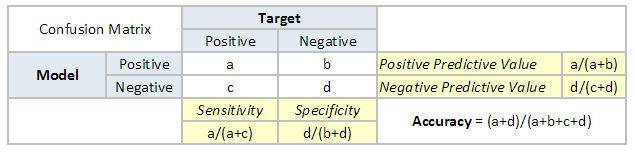

The accuracy for the problem in hand comes out to be 88%.  As you can see from the above two tables, the Positive predictive Value is high, but negative predictive value is quite low. Same holds for Sensitivity and Specificity. This is primarily driven by the threshold value we have chosen. If we decrease our threshold value, the two pairs of starkly different numbers will come closer.

In general we are concerned with one of the above defined metric. For instance, in a pharmaceutical company, they will be more concerned with minimal wrong positive diagnosis. Hence, they will be more concerned about high Specificity. On the other hand an attrition model will be more concerned with Sensitivity. Confusion matrix are generally used only with class output models.

In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

### 2. F1 Score
In the last section, we discussed precision and recall for classification problems and also highlighted the importance of choosing precision/recall basis our use case. What if for a use case, we are trying to get the best precision and recall at the same time? F1-Score is the harmonic mean of precision and recall values for a classification problem. The formula for F1-Score is as follows:

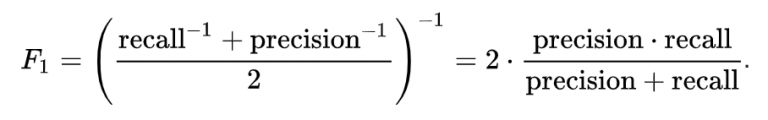

Now, an obvious question that comes to mind is why are taking a harmonic mean and not an arithmetic mean. This is because HM punishes extreme values more. Let us understand this with an example. We have a binary classification model with the following results:

Precision: 0, Recall: 1

Here, if we take the arithmetic mean, we get 0.5. It is clear that the above result comes from a dumb classifier which just ignores the input and just predicts one of the classes as output. Now, if we were to take HM, we will get 0 which is accurate as this model is useless for all purposes.

This seems simple. There are situations however for which a data scientist would like to give a percentage more importance/weight to either precision or recall. Altering the above expression a bit such that we can include an adjustable parameter beta for this purpose, we get:


 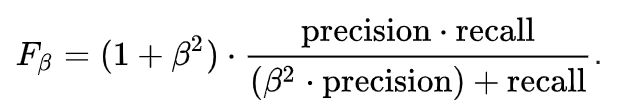
Fbeta measures the effectiveness of a model with respect to a user who attaches β times as much importance to recall as precision.


In [3]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

### 3. Area Under the ROC curve (AUC – ROC)
This is again one of the popular metrics used in the industry.  The biggest advantage of using ROC curve is that it is independent of the change in proportion of responders. This statement will get clearer in the following sections.

Let’s first try to understand what is ROC (Receiver operating characteristic) curve. If we look at the confusion matrix below, we observe that for a probabilistic model, we get different value for each metric.

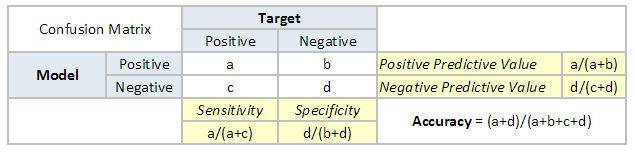

Hence, for each sensitivity, we get a different specificity.The two vary as follows:

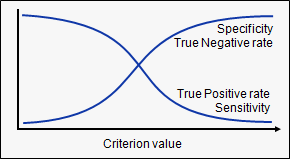

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Following is the ROC curve for the case in hand.

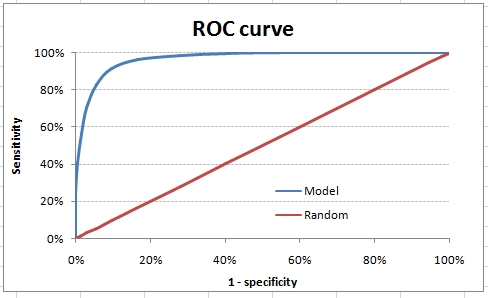

Let’s take an example of threshold = 0.5 (refer to confusion matrix). Here is the confusion matrix :


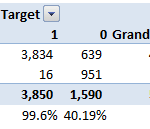
As you can see, the sensitivity at this threshold is 99.6% and the (1-specificity) is ~60%. This coordinate becomes on point in our ROC curve. To bring this curve down to a single number, we find the area under this curve (AUC).

Note that the area of entire square is 1*1 = 1. Hence AUC itself is the ratio under the curve and the total area. For the case in hand, we get AUC ROC as 96.4%. Following are a few thumb rules:

1. .90-1 = excellent (A)
2. .80-.90 = good (B)
3. .70-.80 = fair (C)
4. .60-.70 = poor (D)
5. .50-.60 = fail (F)

We see that we fall under the excellent band for the current model. But this might simply be over-fitting. In such cases it becomes very important to to in-time and out-of-time validations.

Points to Remember:

1. For a model which gives class as output, will be represented as a single point in ROC plot.

2. Such models cannot be compared with each other as the judgement needs to be taken on a single metric and not using multiple metrics. For instance, model with parameters (0.2,0.8) and model with parameter (0.8,0.2) can be coming out of the same model, hence these metrics should not be directly compared.

3. In case of probabilistic model, we were fortunate enough to get a single number which was AUC-ROC. But still, we need to look at the entire curve to make conclusive decisions. It is also possible that one model performs better in some region and other performs better in other.

 

Advantages of using ROC
Why should you use ROC and not metrics like lift curve?

Lift is dependent on total response rate of the population. Hence, if the response rate of the population changes, the same model will give a different lift chart. A solution to this concern can be true lift chart (finding the ratio of lift and perfect model lift at each decile). But such ratio rarely makes sense for the business.

ROC curve on the other hand is almost independent of the response rate. This is because it has the two axis coming out from columnar calculations of confusion matrix. The numerator and denominator of both x and y axis will change on similar scale in case of response rate shift.

 

In [4]:
y_score=model.predict_prob(x)

from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score(y_true, y_pred, average='macro', sample_weight=None)
roc_curve(y_true, y_score[:,1], pos_label=None, sample_weight=None, drop_intermediate=True)


### 4. Log Loss
AUC ROC considers the predicted probabilities for determining our model’s performance. However, there is an issue with AUC ROC, it only takes into account the order of probabilities and hence it does not take into account the model’s capability to predict higher probability for samples more likely to be positive. In that case, we could us the log loss which is nothing but negative average of the log of corrected predicted probabilities for each instance.

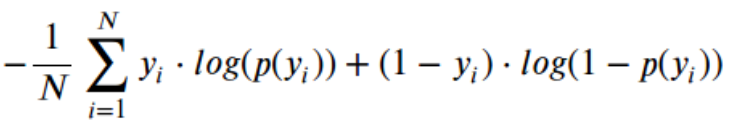

p(yi) is predicted probability of positive class

1-p(yi) is predicted probability of negative class

yi = 1 for positive class and 0 for negative class (actual values)

Let us calculate log loss for a few random values to get the gist of the above mathematical function:

Logloss(1, 0.1) = 2.303

Logloss(1, 0.5) = 0.693

Logloss(1, 0.9) = 0.105

If we plot this relationship, we will get a curve as follows:

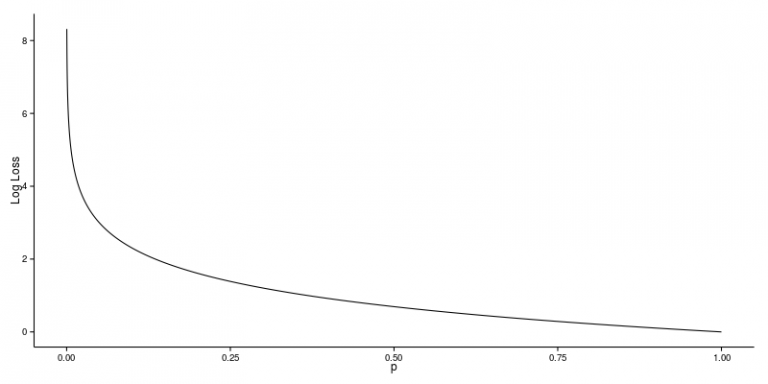

It’s apparent from the gentle downward slope towards the right that the Log Loss gradually declines as the predicted probability improves. Moving in the opposite direction though, the Log Loss ramps up very rapidly as the predicted probability approaches 0.

So, lower the log loss, better the model. However, there is no absolute measure on a good log loss and it is use-case/application dependent.

Whereas the AUC is computed with regards to binary classification with a varying decision threshold, log loss actually takes “certainty” of classification into account.

In [5]:
from sklearn.metrics import log_loss
log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

### 4. Gini Coefficient
Gini coefficient is sometimes used in classification problems. Gini coefficient can be straigh away derived from the AUC ROC number. Gini is nothing but ratio between area between the ROC curve and the diagnol line & the area of the above triangle. Following is the formulae used :

Gini = 2*AUC – 1

Gini above 60% is a good model. For the case in hand we get Gini as 92.7%.

 

### 6. Concordant – Discordant ratio
This is again one of the most important metric for any classification predictions problem. To understand this let’s assume we have 3 students who have some likelihood to pass this year. Following are our predictions :

A – 0.9

B – 0.5

C – 0.3

Now picture this. if we were to fetch pairs of two from these three student, how many pairs will we have? We will have 3 pairs : AB , BC, CA. Now, after the year ends we saw that A and C passed this year while B failed. No, we choose all the pairs where we will find one responder and other non-responder. How many such pairs do we have?

We have two pairs AB and BC. Now for each of the 2 pairs, the concordant pair is where the probability of responder was higher than non-responder. Whereas discordant pair is where the vice-versa holds true. In case both the probabilities were equal, we say its a tie. Let’s see what happens in our case :

AB  – Concordant

BC – Discordant

Hence, we have 50% of concordant cases in this example. Concordant ratio of more than 60% is considered to be a good model. This metric generally is not used when deciding how many customer to target etc. It is primarily used to access the model’s predictive power. For decisions like how many to target are again taken by KS / Lift charts.